In [1]:
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

In [2]:
path_to_library = '/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

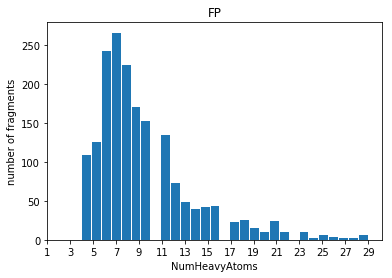

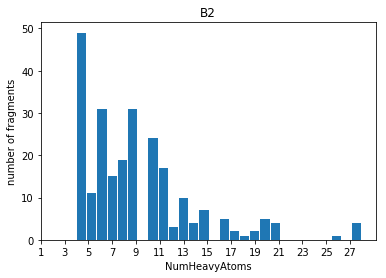

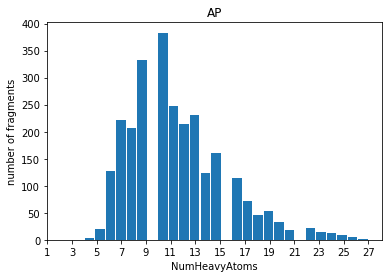

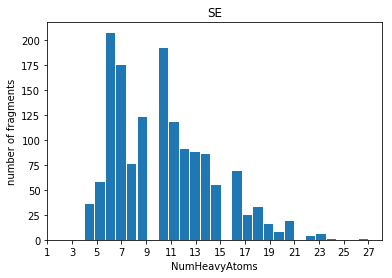

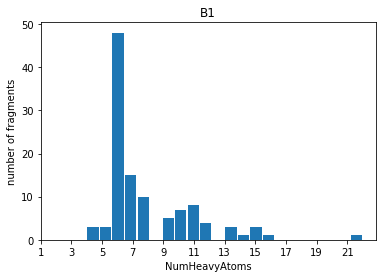

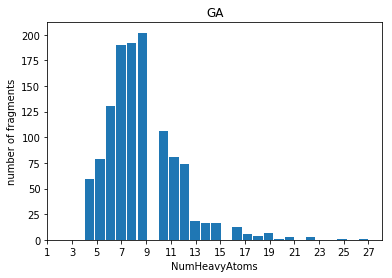

In [3]:
# draw histograms with size of fragments in each subpocket

# iterate over subpockets
for i, folder in enumerate(folders):
    
    allFragments = set()
    numAtoms = []
    files = glob.glob(folder+'/*.sdf')
    # iterate over kinases
    for file in files:
        fragments = Chem.SDMolSupplier(file)
        # iterate over fragments
        for fragment in fragments:
            allFragments.update([fragment])
            numAtoms.append(fragment.GetNumHeavyAtoms())
            tmp = AllChem.Compute2DCoords(fragment)
    
    # img = Draw.MolsToGridImage(list(allFragments),molsPerRow=10,subImgSize=(200,200))
    # img.save(folder+'/all_fragments.png')

    plt.hist(numAtoms, density=False, bins=max(numAtoms), rwidth=0.9)
    plt.title(subpockets[i])
    plt.xlabel('NumHeavyAtoms')
    plt.xticks(np.arange(1, max(numAtoms)+1, 2))
    plt.ylabel('number of fragments')
    plt.savefig(folder+'/NumHeavyAtoms.png')
    plt.show()
     

/home/paula/anaconda3/lib/python3.6/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  % (maxMols))


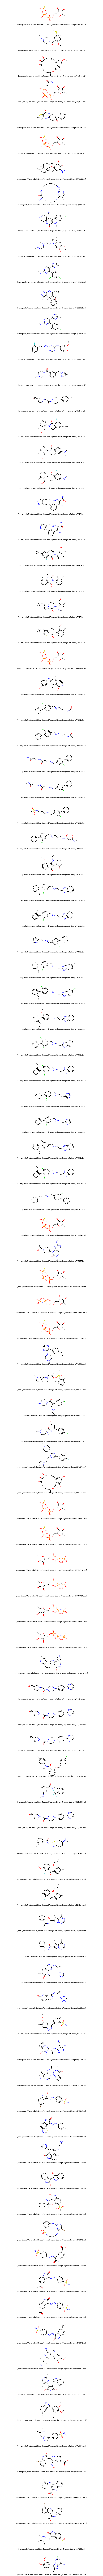

In [4]:
# find ligand corresponding to outlying fragments

legend = []
draw_fragments = []
# iterate over subpockets
for i, folder in enumerate(folders):

    files = glob.glob(folder+'/*.sdf')
    # iterate over kinases
    for file in files:
        fragments = Chem.SDMolSupplier(file)
        # iterate over fragments
        for fragment in fragments:
            numAtoms = fragment.GetNumHeavyAtoms()
            if numAtoms > 20: 
                tmp = AllChem.Compute2DCoords(fragment)
                draw_fragments.append(fragment)
                legend.append(file)
                
Draw.MolsToGridImage(draw_fragments, legends=legend, molsPerRow=1, subImgSize=(800,200), maxMols=100)